<h1> Spotify Data Analysis & Visualisation</h1>

In [142]:
import pandas as pd
dataset_path = 'dataset.csv'
data = pd.read_csv(dataset_path)
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


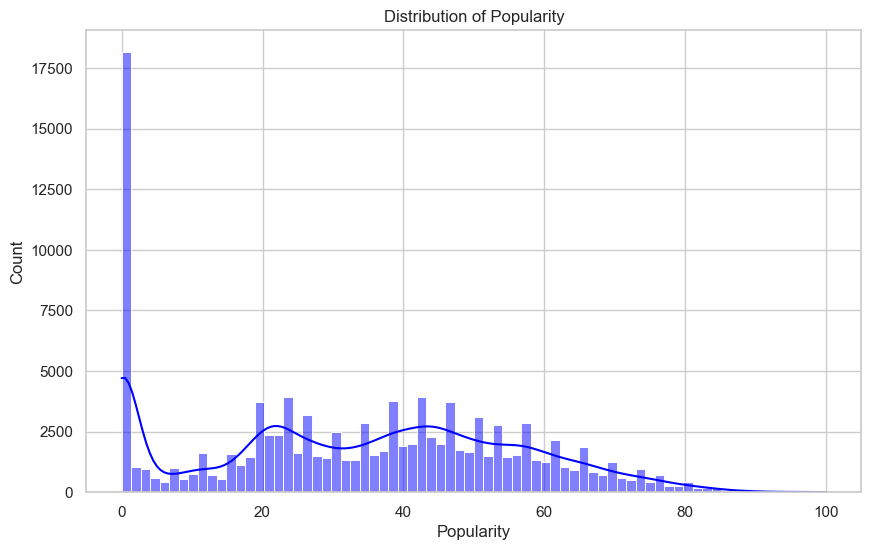

In [143]:
# distribution of the popularity of the tracks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], color='blue', kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

<h3>Cleaning Of Data</h3>

<b>Checking for Null/Empty Values within Data</b>

In [144]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [145]:
data.dropna(subset=['artists', 'album_name', 'track_name'], inplace=True)
data.isnull().sum()
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


<b>Replacing 0 Values with the Mean for each column </b>

In [146]:
#Display rows with popularity 0 
data[data['popularity'] == 0]


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,...,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,acoustic
24,24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.667,...,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic
26,26,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,131760,False,0.620,0.309,...,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
27,27,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,273653,False,0.633,0.429,...,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,acoustic
28,28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.620,0.309,...,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113046,113046,3W73vndiqDkaYwYjSMaSWu,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,117226,False,0.696,0.715,...,-7.741,1,0.0314,0.3400,0.000000,0.1800,0.959,130.021,4,world-music
113047,113047,18FIFh4AGPC2zDLLFkJp4j,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,175426,False,0.581,0.436,...,-7.936,1,0.0443,0.2320,0.000000,0.0547,0.412,120.138,4,world-music
113048,113048,6xw4sP2mGqAtVYZkBojxcI,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,193653,False,0.413,0.437,...,-7.983,0,0.0327,0.0420,0.000036,0.1460,0.102,120.259,4,world-music
113049,113049,6E7Ix5jkd6uzfoxuvcI8Ww,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,217120,False,0.607,0.884,...,-4.059,1,0.0489,0.0230,0.000000,0.2260,0.555,139.988,4,world-music


In [147]:
data.loc[data['popularity'] <= 5, 'popularity'] = data['popularity'].mean()
# Show Jason Mraz song Coffee Moment
data[data['track_name'].str.contains("Can't Help Falling In Love")]

C:\Users\kylem\AppData\Local\Temp\ipykernel_21908\385967684.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '33.23882665637418' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['popularity'] <= 5, 'popularity'] = data['popularity'].mean()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933,False,0.2660,0.0596,...,-18.515,1,0.0363,0.905,0.000071,0.132,0.1430,181.740,3,acoustic
279,279,24UxG3p1Ghtc5ejJtGBoeL,Kina Grannis,Can't Help Falling In Love (Piano Version),Can't Help Falling In Love - Piano Version,54.0,211624,False,0.2710,0.0937,...,-15.035,1,0.0367,0.939,0.000000,0.108,0.1470,164.721,5,acoustic
533,533,14UvqLsdqw2dsmVkmTYptE,Kina Grannis,The Living Room Sessions Vol. 3,Can't Help Falling In Love,48.0,188354,False,0.4440,0.1430,...,-11.449,1,0.0302,0.925,0.000069,0.118,0.1320,100.341,3,acoustic
26503,26503,3vn3IG9kFZ4Kkn0fNwM7PC,Benny Martin;The Wong Janice,Can't Help Falling In Love (Piano & Cello),Can't Help Falling In Love - Piano & Cello,45.0,190330,False,0.2000,0.1290,...,-18.685,1,0.0370,0.844,0.839000,0.108,0.1330,136.939,4,disney
76057,76057,3R7qNohsO7ucKyQDodJxFc,Andrea Bocelli,Amore (Remastered),Can't Help Falling In Love - Live At Lake Las ...,51.0,205182,False,0.4610,0.3990,...,-7.894,1,0.0244,0.813,0.013800,0.911,0.1680,97.381,3,opera
76267,76267,3RPUlfBMYL7KCApbHMNE91,Andrea Bocelli;David Foster,Andrea Bocelli Spotify Sessions (Live),Can't Help Falling In Love - Live From Spotify...,53.0,179869,False,0.2840,0.6010,...,-7.194,1,0.0686,0.926,0.000189,0.527,0.2050,93.221,3,opera
76307,76307,1c5Kt0WUOooNyUILXAXYoR,André Rieu;Johann Strauss Orchestra,Falling In Love,Can't Help Falling In Love,53.0,229133,False,0.0805,0.2510,...,-15.969,1,0.0372,0.902,0.868000,0.120,0.0525,81.644,3,opera
90101,90101,4hAUynwghvrqDXs1ejKNEq,Elvis Presley,Elvis 30 #1 Hits,Can't Help Falling In Love,65.0,177840,False,0.4380,0.3250,...,-11.066,1,0.0268,0.893,0.000005,0.107,0.3620,101.577,3,rock-n-roll
92151,92151,4hAUynwghvrqDXs1ejKNEq,Elvis Presley,Elvis 30 #1 Hits,Can't Help Falling In Love,65.0,177840,False,0.4380,0.3250,...,-11.066,1,0.0268,0.893,0.000005,0.107,0.3620,101.577,3,rockabilly
92776,92776,66t429vEmiqGQoXSrBEGYP,Elvis Presley,Elvis Recorded Live on Stage in Memphis (Legac...,Can't Help Falling In Love - Live at Mid-South...,24.0,98546,False,0.4480,0.7990,...,-7.572,1,0.0511,0.305,0.000030,0.937,0.6880,51.953,4,rockabilly


<b>Check For Duplicate Songs</b>
<ul>
<li>As songs are repeated as the same song appears on an EP and an Album and a "Best Of" We have to remove the unnessecary duplicates and keep the one with the best popularity score</li>
<li> We also need to take careful consideration in cleansing of data here as there could be an artist that has done a cover of the original song so it would have the same name and title <b>A prime example of this would be "Can't Help Falling In Love"</b></li>
</ul>

In [148]:
# Check for duplicates by song name
data[data.duplicated(subset='track_name', keep=False)]

# Display all track names with "Can't Help Falling In Love"
data[data['track_name'].str.contains("Can't Help Falling In Love")]


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933,False,0.2660,0.0596,...,-18.515,1,0.0363,0.905,0.000071,0.132,0.1430,181.740,3,acoustic
279,279,24UxG3p1Ghtc5ejJtGBoeL,Kina Grannis,Can't Help Falling In Love (Piano Version),Can't Help Falling In Love - Piano Version,54.0,211624,False,0.2710,0.0937,...,-15.035,1,0.0367,0.939,0.000000,0.108,0.1470,164.721,5,acoustic
533,533,14UvqLsdqw2dsmVkmTYptE,Kina Grannis,The Living Room Sessions Vol. 3,Can't Help Falling In Love,48.0,188354,False,0.4440,0.1430,...,-11.449,1,0.0302,0.925,0.000069,0.118,0.1320,100.341,3,acoustic
26503,26503,3vn3IG9kFZ4Kkn0fNwM7PC,Benny Martin;The Wong Janice,Can't Help Falling In Love (Piano & Cello),Can't Help Falling In Love - Piano & Cello,45.0,190330,False,0.2000,0.1290,...,-18.685,1,0.0370,0.844,0.839000,0.108,0.1330,136.939,4,disney
76057,76057,3R7qNohsO7ucKyQDodJxFc,Andrea Bocelli,Amore (Remastered),Can't Help Falling In Love - Live At Lake Las ...,51.0,205182,False,0.4610,0.3990,...,-7.894,1,0.0244,0.813,0.013800,0.911,0.1680,97.381,3,opera
76267,76267,3RPUlfBMYL7KCApbHMNE91,Andrea Bocelli;David Foster,Andrea Bocelli Spotify Sessions (Live),Can't Help Falling In Love - Live From Spotify...,53.0,179869,False,0.2840,0.6010,...,-7.194,1,0.0686,0.926,0.000189,0.527,0.2050,93.221,3,opera
76307,76307,1c5Kt0WUOooNyUILXAXYoR,André Rieu;Johann Strauss Orchestra,Falling In Love,Can't Help Falling In Love,53.0,229133,False,0.0805,0.2510,...,-15.969,1,0.0372,0.902,0.868000,0.120,0.0525,81.644,3,opera
90101,90101,4hAUynwghvrqDXs1ejKNEq,Elvis Presley,Elvis 30 #1 Hits,Can't Help Falling In Love,65.0,177840,False,0.4380,0.3250,...,-11.066,1,0.0268,0.893,0.000005,0.107,0.3620,101.577,3,rock-n-roll
92151,92151,4hAUynwghvrqDXs1ejKNEq,Elvis Presley,Elvis 30 #1 Hits,Can't Help Falling In Love,65.0,177840,False,0.4380,0.3250,...,-11.066,1,0.0268,0.893,0.000005,0.107,0.3620,101.577,3,rockabilly
92776,92776,66t429vEmiqGQoXSrBEGYP,Elvis Presley,Elvis Recorded Live on Stage in Memphis (Legac...,Can't Help Falling In Love - Live at Mid-South...,24.0,98546,False,0.4480,0.7990,...,-7.572,1,0.0511,0.305,0.000030,0.937,0.6880,51.953,4,rockabilly


In [149]:
# Sort data by 'popularity' descending to ensure highest popularity is kept when deduplicating
data.sort_values('popularity', ascending=False, inplace=True)
# Drop duplicates based on 'track_name' and 'artists' keeping the first entry with the highest popularity
data.drop_duplicates(subset=['track_name', 'artists'], keep='first', inplace=True)
# Check entries to see if there are any duplicates left for a specific track name
data[data['track_name'].str.contains("Can't Help Falling In Love")]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933,False,0.2660,0.0596,...,-18.515,1,0.0363,0.905,0.000071,0.132,0.1430,181.740,3,acoustic
90101,90101,4hAUynwghvrqDXs1ejKNEq,Elvis Presley,Elvis 30 #1 Hits,Can't Help Falling In Love,65.0,177840,False,0.4380,0.3250,...,-11.066,1,0.0268,0.893,0.000005,0.107,0.3620,101.577,3,rock-n-roll
279,279,24UxG3p1Ghtc5ejJtGBoeL,Kina Grannis,Can't Help Falling In Love (Piano Version),Can't Help Falling In Love - Piano Version,54.0,211624,False,0.2710,0.0937,...,-15.035,1,0.0367,0.939,0.000000,0.108,0.1470,164.721,5,acoustic
76267,76267,3RPUlfBMYL7KCApbHMNE91,Andrea Bocelli;David Foster,Andrea Bocelli Spotify Sessions (Live),Can't Help Falling In Love - Live From Spotify...,53.0,179869,False,0.2840,0.6010,...,-7.194,1,0.0686,0.926,0.000189,0.527,0.2050,93.221,3,opera
76307,76307,1c5Kt0WUOooNyUILXAXYoR,André Rieu;Johann Strauss Orchestra,Falling In Love,Can't Help Falling In Love,53.0,229133,False,0.0805,0.2510,...,-15.969,1,0.0372,0.902,0.868000,0.120,0.0525,81.644,3,opera
76057,76057,3R7qNohsO7ucKyQDodJxFc,Andrea Bocelli,Amore (Remastered),Can't Help Falling In Love - Live At Lake Las ...,51.0,205182,False,0.4610,0.3990,...,-7.894,1,0.0244,0.813,0.013800,0.911,0.1680,97.381,3,opera
26503,26503,3vn3IG9kFZ4Kkn0fNwM7PC,Benny Martin;The Wong Janice,Can't Help Falling In Love (Piano & Cello),Can't Help Falling In Love - Piano & Cello,45.0,190330,False,0.2000,0.1290,...,-18.685,1,0.0370,0.844,0.839000,0.108,0.1330,136.939,4,disney
92776,92776,66t429vEmiqGQoXSrBEGYP,Elvis Presley,Elvis Recorded Live on Stage in Memphis (Legac...,Can't Help Falling In Love - Live at Mid-South...,24.0,98546,False,0.4480,0.7990,...,-7.572,1,0.0511,0.305,0.000030,0.937,0.6880,51.953,4,rockabilly


<b> Displaying Of Data after light cleansing</b>

In [150]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100.0,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.013000,0.000005,0.2660,0.2380,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99.0,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.012500,0.033000,0.2300,0.5500,128.033,4,hip-hop
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98.0,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.583000,0.000002,0.2180,0.8500,124.980,4,latin
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98.0,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.003830,0.000007,0.3710,0.3040,128.040,4,dance
67359,67359,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97.0,243716,False,0.650,0.715,...,-5.198,0,0.2530,0.099300,0.000291,0.1260,0.1870,106.672,4,latin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59195,59195,6jvjrL3XFkekryBLPnWeMw,Alphaxone,Edge of Solitude,Ocean Grooves,6.0,338127,False,0.202,0.164,...,-19.458,0,0.0464,0.299000,0.927000,0.0897,0.0388,67.774,4,iranian
24709,24709,5pLcVrHtA4bWr5goYCy87n,Aux 88,AUX 88,We Are The Future,6.0,317123,False,0.786,0.789,...,-13.235,0,0.0592,0.000028,0.705000,0.0488,0.1900,134.976,4,detroit-techno
24716,24716,3v830vuEbG5iX9drGk9Hge,Aaron Carl,Flash,Justa Groove,6.0,303397,False,0.972,0.868,...,-8.890,0,0.3300,0.005020,0.884000,0.1030,0.9330,127.030,4,detroit-techno
24717,24717,28e0RmCMDQGVk7yVxOiIzF,Omar S,It Can Be Done but Only I Can Do It,Supported Solely,6.0,482253,False,0.807,0.947,...,-16.460,1,0.0706,0.011200,0.938000,0.0450,0.1300,119.994,4,detroit-techno


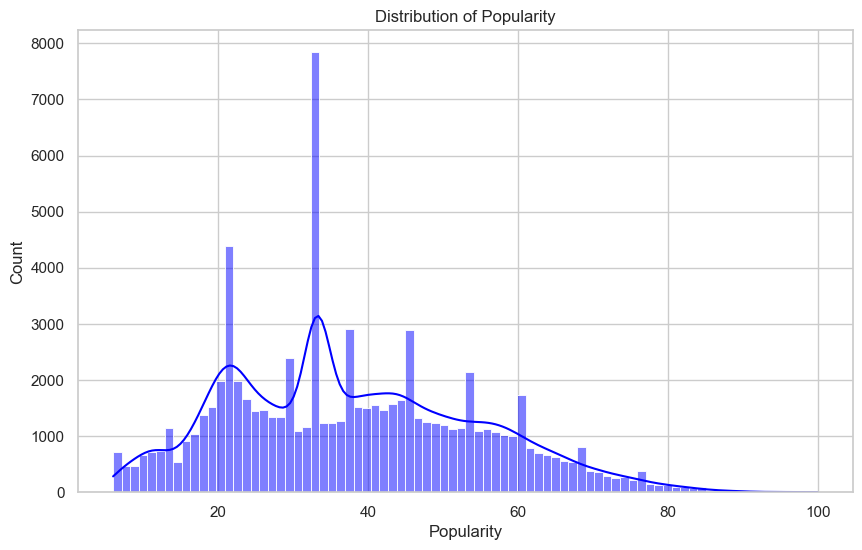

In [151]:
# distribution of the popularity of the tracks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], color='blue', kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

<b> We can now see that the distribution of popularity now is more closely representing standard deviation, meaning the data is distributed more evenly and fairly</b>
</br>
In comparison to the initial distribution we can see that a lot of the errors were fixed with the missing data and the null values of the data for popularity

In [154]:
# Drop Data to only include top 30 artists
top_artists = data['artists'].value_counts().head(50).index
data = data[data['artists'].isin(top_artists)]
data 


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
91001,91001,5XeFesFbtLpXzIVDNQP22n,Arctic Monkeys,AM,I Wanna Be Yours,92.0,183956,False,0.4640,0.417,...,-9.345,0,0.0256,0.13600,0.022000,0.0974,0.4790,67.528,4,rock
57058,57058,0BxE4FqsDD1Ot4YuBXwAPp,Arctic Monkeys,Favourite Worst Nightmare,505,88.0,253586,False,0.5260,0.866,...,-5.822,1,0.0568,0.00287,0.000078,0.0945,0.2480,140.266,4,indie
91101,91101,5FVd6KXrgO9B3JPmC8OPst,Arctic Monkeys,AM,Do I Wanna Know?,88.0,272394,False,0.5480,0.532,...,-7.596,1,0.0323,0.18600,0.000263,0.2170,0.4050,85.030,4,rock
57103,57103,086myS9r57YsLbJpU0TgK9,Arctic Monkeys,AM,Why'd You Only Call Me When You're High?,88.0,161123,False,0.6910,0.631,...,-6.478,1,0.0368,0.04830,0.000011,0.1040,0.8000,92.004,4,indie
71001,71001,60a0Rd6pjrkxjPbaKzXjfq,Linkin Park,Hybrid Theory (Bonus Edition),In the End,85.0,216880,False,0.5560,0.864,...,-5.870,0,0.0584,0.00958,0.000000,0.2090,0.4000,105.143,4,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,59189,1Ra44Igv2rVXj9Q8Ba23YY,Alphaxone,Absence of Motion,Inner Horizon,6.0,324253,False,0.0682,0.576,...,-18.360,0,0.0701,0.83300,0.935000,0.0685,0.0367,64.693,3,iranian
59179,59179,6UjGHrvy8Ajboi3POTl5sN,Alphaxone,Ghost Machine,Compression,6.0,330913,False,0.0766,0.111,...,-22.735,1,0.0402,0.53700,0.889000,0.1110,0.0344,175.415,4,iranian
59178,59178,0Ya0PNkjjqAp8dvgnkPPJC,Alphaxone,Ghost Machine,Experience,6.0,322120,False,0.0940,0.152,...,-23.682,1,0.0422,0.63600,0.945000,0.1150,0.0357,86.377,1,iranian
59194,59194,0BhIaqQwmn9mbG9pCuIMDs,Alphaxone,Dystopian Gate,Hollow Lands,6.0,325859,False,0.1210,0.139,...,-24.034,1,0.0366,0.11100,0.854000,0.1070,0.0393,96.548,3,iranian


artists
BTS                            69.394495
Rammstein                      62.328571
Arctic Monkeys                 61.272388
The Beatles                    60.315436
Pink Floyd                     55.214286
Linkin Park                    54.226190
Elvis Presley                  53.753086
Jay Chou                       52.333333
CoComelon                      51.101124
Hillsong Worship               44.171053
Glee Cast                      40.530435
Charlie Brown Jr.              39.642857
my little airport              33.386503
Håkan Hellström                32.256056
The Prophet                    27.360353
Sujatha                        27.000000
Almafuerte                     26.744504
Nogizaka46                     25.763889
Seiko Matsuda                  25.695652
Germaine Franco                24.125000
Dan Gibson's Solitudes         23.568182
Scooter                        23.482759
Vybz Kartel                    22.766454
Shiritsu Ebisu Chugaku         21.420290
Carlos G